In [1]:
from dtw import dtw
import math
import numpy as np
from random import *
from scipy.spatial.distance import euclidean
from scipy import stats
from fastdtw import fastdtw
from sklearn.preprocessing import MinMaxScaler
import sys
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def readFile(fname):
    with open(fname) as f:
        content = f.readlines()
    temp = [x.strip().split(',') for x in content]
    arr = np.array([float(x[1]) for x in temp])
    return arr



In [3]:

def createZeroArray(size):
    return np.array([0]*size).reshape(-1, 1)

In [4]:
def computeDistance(fname1, fname2):
    array1 = readFile(fname1).reshape(-1, 1)
    array2 = readFile(fname2).reshape(-1, 1)
    distanceXY, _ = fastdtw(stats.zscore(array1), stats.zscore(array2),  dist=euclidean)
    size = max(len(array1),len(array2))
    distanceX0, _ = fastdtw(stats.zscore(array1), createZeroArray(size), dist=euclidean)
    distance0Y, _ = fastdtw(createZeroArray(size), stats.zscore(array2), dist=euclidean)
    correlation = 1 - (distanceXY/(distanceX0 + distance0Y))
    return correlation


In [5]:
def plot_graph(df1,df2,column1,column2,label1,label2,title):
    plt.figure(figsize=(12,5))
    plt.title(title)
    ax1 = df1[column1].plot(color='blue', grid=True, label=label1)
    ax2 = df2[column2].plot(color='red', grid=True, secondary_y=True, label=label2)
    ax1.legend(loc=2)
    ax2.legend(loc=1)
    plt.show()
    

In [6]:
file1 = "Crime/Output/2016/monthly_complaint_count_2016.csv"
file2 = "Weather/Output/monthly_average_temp_2016.csv"
correlation = computeDistance(file1,file2)
print("correlation between Crime and Temperature for 2016 monthly is:", correlation)


correlation between Crime and Temperature for 2016 monthly is: 0.7286704582654923


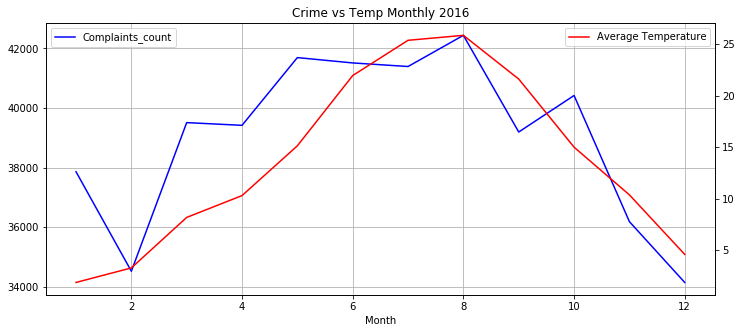

In [7]:
crime_df = pd.read_csv(file1,sep=',', names = ["Month","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Month","Average Temperature"],index_col=0)
title = "Crime vs Temp Monthly 2016"
plot_graph(crime_df,weather_df,'Complaints_count',"Average Temperature",'Complaints_count',"Average Temperature", title)

In [8]:
# daily crime for 2011-2016 correlation with temperature
file1 = "Crime/Output/daily_complaint_count_2011-17.csv"
file2 = "Weather/Output/daily_average_temp.csv"
correlation = computeDistance(file1,file2)
print("correlation between Crime and Temperature for 2011-2016 daily is:", correlation)


correlation between Crime and Temperature for 2011-2016 daily is: 0.6186172106629679


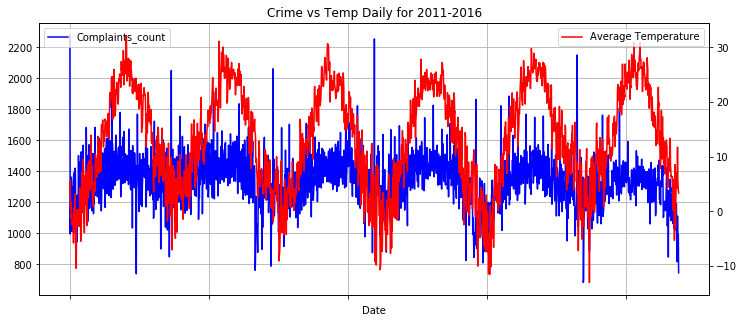

In [9]:
crime_df = pd.read_csv(file1,sep=',', names = ["Date","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Date","Average Temperature"],index_col=0)
title = "Crime vs Temp Daily for 2011-2016"
plot_graph(crime_df,weather_df,'Complaints_count',"Average Temperature",'Complaints_count',"Average Temperature", title)

In [10]:
# Top n crime complaints date from 2011-2016
top_n_crime_dates = crime_df['Complaints_count'].argsort()[-10:][::-1]
top_n_crime_dates = crime_df.index[top_n_crime_dates]
print("Top 10 dates wit maximum crime compaints from 2011-2016 are:",top_n_crime_dates)

Top 10 dates wit maximum crime compaints from 2011-2016 are: Index(['2011-01-01', '2014-01-01', '2016-01-01', '2013-01-01', '2012-01-01',
       '2011-06-01', '2012-06-01', '2015-05-01', '2015-01-01', '2012-09-01'],
      dtype='object', name='Date')


As we can see the maximum number of crimes are reported on 01 Jan of every year. Since therea are a lot of people outoside on
the new years day and a lot of tourists as well. This explains the high rate of crime on these days

In [11]:
# Jan 2015 Murder Rate

In [12]:
# daily crime for 2011-2017 correlation with Snow ACCUMULATION
file1 = "Crime/Output/daily_complaint_count_2011-17.csv"
file2 = "Weather/Output/daily_average_snow.csv"
correlation = computeDistance(file1,file2)
print("correlation between Crime and Snow for 2011-2016 daily is:", correlation)


correlation between Crime and Snow for 2011-2016 daily is: 0.13692489330888857


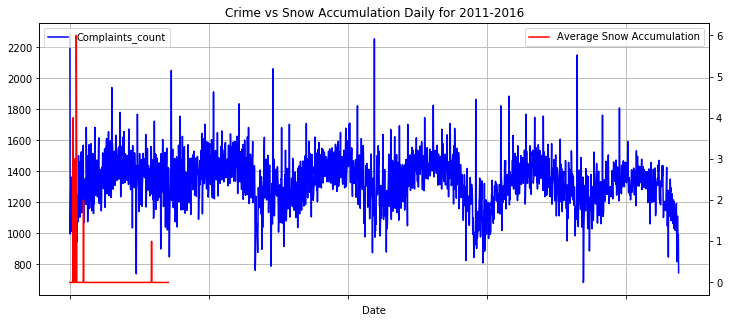

In [13]:
crime_df = pd.read_csv(file1,sep=',', names = ["Date","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Date","Average Snow Accumulation"],index_col=0)
title = "Crime vs Snow Accumulation Daily for 2011-2016"
plot_graph(crime_df,weather_df,'Complaints_count',"Average Snow Accumulation",'Complaints_count',"Average Snow Accumulation", title)

In [14]:
# daily crime from 2011-2016 correlation with Precipitation
file1 = "Crime/Output/daily_complaint_count_2011-17.csv"
file2 = "Weather/Output/daily_average_precipitation.csv"
correlation = computeDistance(file1,file2)
print("correlation between Crime and Precipitation for 2011-2016 daily is:", correlation)

correlation between Crime and Precipitation for 2011-2016 daily is: 0.391981837307372


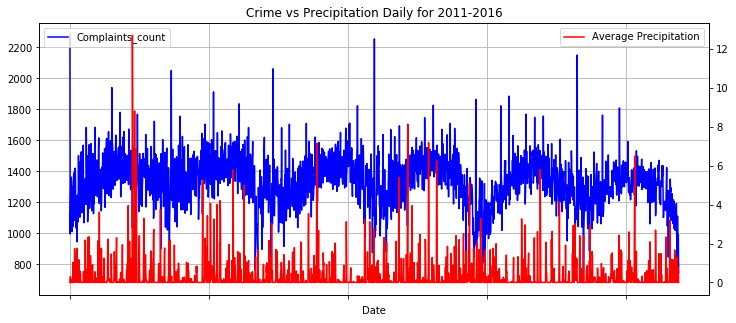

In [15]:
crime_df = pd.read_csv(file1,sep=',', names = ["Date","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Date","Average Precipitation"],index_col=0)
title = "Crime vs Precipitation Daily for 2011-2016"
plot_graph(crime_df,weather_df,'Complaints_count',"Average Precipitation",'Complaints_count',"Average Precipitation", title)

In [36]:
# daily crime from 2011-2016 correlation with wind speed 
file1 = "Crime/Output/daily_complaint_count_2011-17.csv"
file2 = "Weather/Output/daily_average_wind_speed.csv"
correlation = computeDistance(file1,file2)
print("correlation between Crime and Wind Speed for 2011-2016 daily is:", correlation)

correlation between Crime and Wind Speed for 2011-2016 daily is: 0.4731557377655127


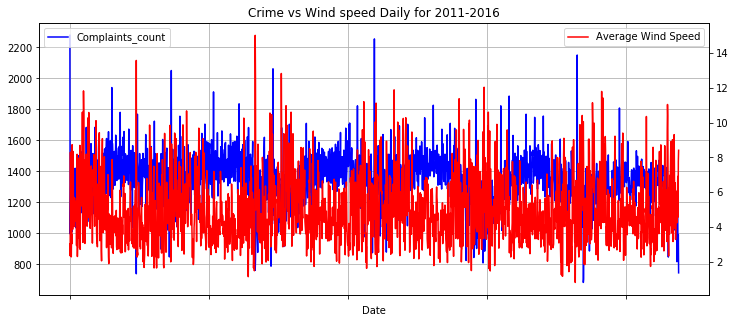

In [37]:
crime_df = pd.read_csv(file1,sep=',', names = ["Date","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Date","Average Wind Speed"],index_col=0)
title = "Crime vs Wind speed Daily for 2011-2016"
plot_graph(crime_df,weather_df,'Complaints_count','Average Wind Speed','Complaints_count','Average Wind Speed', title)

In [18]:
# Assault 2016
# Burgulary 2016
# Murder 2016
# Grand LARCENY AND MOTOR THEFT 2106
# Vehicle and Traffic Crimes

In [19]:
# July 2016 Crime rate
# Jan 2015 Murder Rate

In [20]:
#correlation of Assault with Temperature 2016 Monthly 
file1 = "Crime/Output/2016/ASSAULT_2016_Monthly.csv"
file2 = "Weather/Output/monthly_average_temp_2016.csv"
correlation = computeDistance(file1,file2)
print("correlation between Assault and Temperature for 2016 monthly is:", correlation)

correlation between Assault and Temperature for 2016 monthly is: 0.7885330900112812


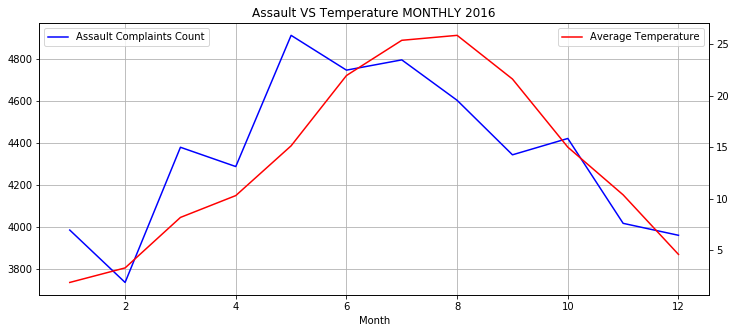

In [21]:
crime_df = pd.read_csv(file1,sep=',', names = ["Month","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Month","Average Temperature"],index_col=0)
title = "Assault VS Temperature MONTHLY 2016"
plot_graph(crime_df,weather_df,'Complaints_count','Average Temperature','Assault Complaints Count','Average Temperature', title)

In [22]:
# Top 3 Assault complaints months from 2011-2016
top_n_crime_dates = crime_df['Complaints_count'].argsort()[-3:][::-1]
top_n_crime_dates = crime_df.index[top_n_crime_dates]
print("Top 3 Months wit maximum Assault compaints in 2016 are:",top_n_crime_dates)

Top 3 Months wit maximum Assault compaints in 2016 are: Int64Index([5, 7, 6], dtype='int64', name='Month')


In [23]:
#correlation of Murder with Temperature 2016 Monthly 
file1 = "Crime/Output/2016/MURDER_2016_Monthly.csv"
file2 = "Weather/Output/monthly_average_temp_2016.csv"
correlation = computeDistance(file1,file2)
print("correlation between Murder and Temperature for 2016 monthly is:", correlation)

correlation between Murder and Temperature for 2016 monthly is: 0.7546422722466478


Observation:
ASSAULT and Murder Complaints count are highest in summer as compared to winter.It's not necessarily because warmer temperatures bring out more aggression leading to more assaults. As James Alan Fox, a professor of criminology at Northeastern University points out, it's more likely that there are more people out and about, which means there are more potential victims outside.


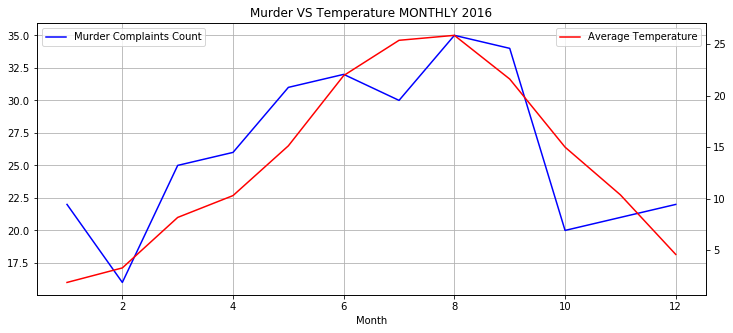

In [24]:
crime_df = pd.read_csv(file1,sep=',', names = ["Month","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Month","Average Temperature"],index_col=0)
title = "Murder VS Temperature MONTHLY 2016"
plot_graph(crime_df,weather_df,'Complaints_count','Average Temperature','Murder Complaints Count','Average Temperature', title)

In [25]:
#correlation of Burgulary with Temperature 2016 Monthly 
file1 = "Crime/Output/2016/BURGLARY_2016_Monthly.csv"
file2 = "Weather/Output/monthly_average_temp_2016.csv"
correlation = computeDistance(file1,file2)
print("correlation between BURGULARY and Temperature for 2016 monthly is:", correlation)


correlation between BURGULARY and Temperature for 2016 monthly is: 0.6747466180472903


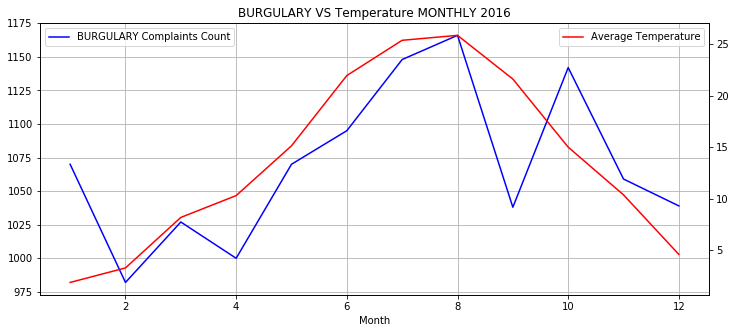

In [26]:
crime_df = pd.read_csv(file1,sep=',', names = ["Month","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Month","Average Temperature"],index_col=0)
title = "BURGULARY VS Temperature MONTHLY 2016"
plot_graph(crime_df,weather_df,'Complaints_count','Average Temperature','BURGULARY Complaints Count','Average Temperature', title)

While it seems like warm temperatures bring out the worst in people,it's actually the changing habits that bring about an increase in crime. During the summer, many people start to leave their windows open to try to cool off their houses. Additionally, they tend to leave the house more frequently as they attend different summer activities. Both of these activities give burglars a perfect opportunity to enter the home.


In [27]:
#correlation of Vehicle and Traffic Crimes 2106 with Temperature 2016 Monthly 
file1 = "Crime/Output/2016/VEHICLE_AND_TRAFFIC_LAWS_2016_Monthly.csv"
file2 = "Weather/Output/monthly_average_temp_2016.csv"
correlation = computeDistance(file1,file2)
print("correlation between VEHICLE_AND_TRAFFIC_LAWS Crime and Temperature for 2016 monthly is:", correlation)


correlation between VEHICLE_AND_TRAFFIC_LAWS Crime and Temperature for 2016 monthly is: 0.6476745911243067


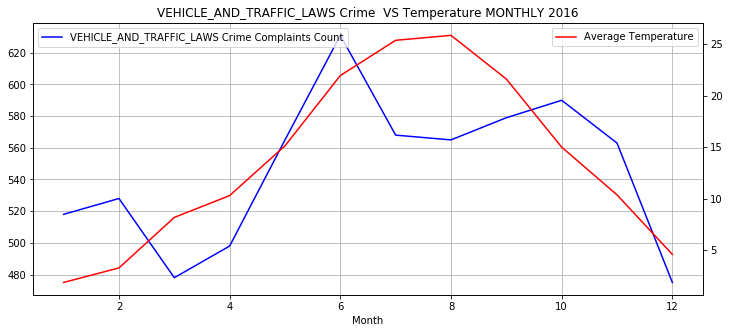

In [28]:
crime_df = pd.read_csv(file1,sep=',', names = ["Month","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Month","Average Temperature"],index_col=0)
title = "VEHICLE_AND_TRAFFIC_LAWS Crime  VS Temperature MONTHLY 2016"
plot_graph(crime_df,weather_df,'Complaints_count','Average Temperature','VEHICLE_AND_TRAFFIC_LAWS Crime Complaints Count','Average Temperature', title)

Observation:
Vehicle and traffic laws crime are maximum in summer especially in June as higher temperatures bring aggression, lackof patience and thus road rage resulting in more violations.

In [29]:
#correlation of Grand LARCENY AND MOTOR THEFT 2106 with Temperature 2016 Monthly 
file1 = "Crime/Output/2016/GRAND_LARCENY_MOTOR_VEHICLE_2016_Monthly.csv"
file2 = "Weather/Output/monthly_average_temp_2016.csv"
correlation = computeDistance(file1,file2)
print("correlation between GRAND_LARCENY_MOTOR_VEHICLE Crime and Temperature for 2016 monthly is:", correlation)


correlation between GRAND_LARCENY_MOTOR_VEHICLE Crime and Temperature for 2016 monthly is: 0.7984051739072259


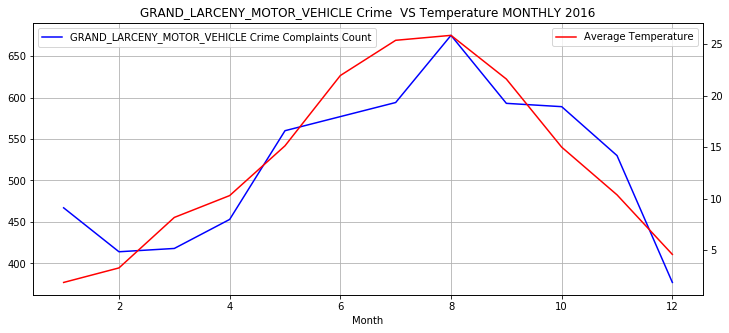

In [30]:
crime_df = pd.read_csv(file1,sep=',', names = ["Month","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Month","Average Temperature"],index_col=0)
title = "GRAND_LARCENY_MOTOR_VEHICLE Crime  VS Temperature MONTHLY 2016"
plot_graph(crime_df,weather_df,'Complaints_count','Average Temperature','GRAND_LARCENY_MOTOR_VEHICLE Crime Complaints Count','Average Temperature', title)

Observation:
While most crime rates seem to drop as the temperatures go down, there is one exception: car theft. In fact, car theft incidences actually jump when temperatures takes negative values. This increase in crime is likely because car owners leave their vehicles running with the heat on to warm up their cars or defrost their windows. An unattended car that's running is the perfect opportunity for a car thief

In [31]:
# July 2016 Crime rate Vs Temperature
file1 = "Crime/Output/July2016Crime.csv"
file2 = "Weather/Output/daily_average_temp_july_2016.csv"
correlation = computeDistance(file1,file2)
print("correlation between Crime and Temperature for July 2016 daily is:", correlation)


correlation between Crime and Temperature for July 2016 daily is: 0.5969149713334717


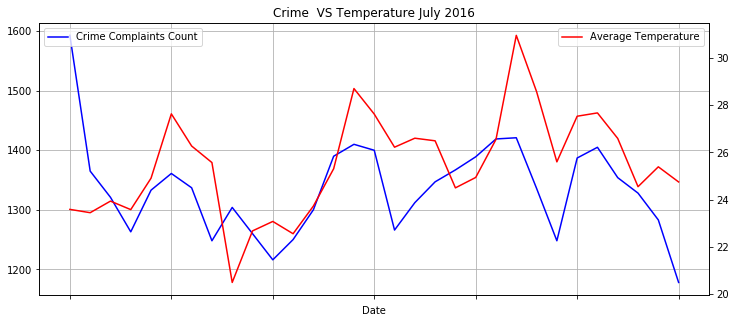

In [32]:
crime_df = pd.read_csv(file1,sep=',', names = ["Date","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Date","Average Temperature"],index_col=0)
title = "Crime  VS Temperature July 2016"
plot_graph(crime_df,weather_df,'Complaints_count','Average Temperature','Crime Complaints Count','Average Temperature', title)

Observation:
While crime seems to spike when it's warm outside, if temperatures rise above 32 degrees celsius, crime starts to decline again. People seek shelter inside and no longer spend as much time outside.


In [33]:
# Jan 2015 Murder and Homicide Correlation with temperature
file1 = "Crime/Output/Jan2015_Murder.csv"
file2 = "Weather/Output/daily_average_temp_jan_2015.csv"
correlation = computeDistance(file1,file2)
print("correlation between Murder and Temperature for Jan 2015 daily is:", correlation)

correlation between Murder and Temperature for Jan 2015 daily is: 0.48462242183978166


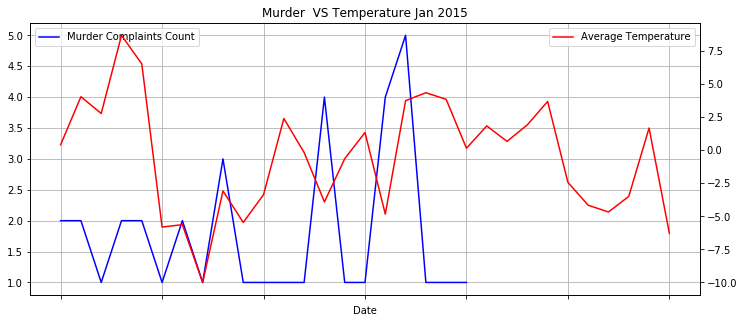

In [34]:
crime_df = pd.read_csv(file1,sep=',', names = ["Date","Complaints_count"],index_col=0)
weather_df= pd.read_csv(file2,sep=',',names = ["Date","Average Temperature"],index_col=0)
title = "Murder  VS Temperature Jan 2015"
plot_graph(crime_df,weather_df,'Complaints_count','Average Temperature','Murder Complaints Count','Average Temperature', title)

Observation:
Offense rates drop when the temperature goes below 5 degree celsius. Additionally, many crimes continue to decrease as the temperatures get colder.

Fact:
In 2015, record-breaking cold temperatures were measured across the eastern portion of the country.
During this period, New York City had a 12-day span without a homicide, the longest since the police started to
keep track in 1994. Jan 12 2015
